### MOVIE RECOMMENDATIONS SYSTEM 

#### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
credits = pd.read_csv('credits.csv')
movies = pd.read_csv('movies.csv')

In [7]:
credits


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [8]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [9]:
print(movies.columns)
df = credits.merge(movies, left_on='movie_id', right_on='id')

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [11]:
%pip install ast

  Using cached AST-0.0.2.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\DELL\AppData\Local\Temp\pip-install-2xi74kar\ast_97bb2f7e6c1748cba928c41a86c96e5e\setup.py", line 6, in <module>
      README = codecs.open(os.path.join(here, 'AST/README'), encoding='utf8').read()
    File "F:\Users\Dell\Anaconda3\lib\codecs.py", line 906, in open
      file = builtins.open(filename, mode, buffering)
  FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-2xi74kar\\ast_97bb2f7e6c1748cba928c41a86c96e5e\\AST/README'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

no

In [12]:
import ast
def get_features(cast):
    output = []
    for x in ast.literal_eval(cast):
        output.append(x.get('name'))
    return np.unique(np.array(output)).tolist()

def get_director(crew):
    for member in ast.literal_eval(crew):
        if member.get('job') == 'Director':
            return member.get('name')
    return 'Unknown'

In [13]:

credits['Director'] = credits['crew'].apply(lambda x: get_director(x))
credits.drop(columns=['crew'], inplace=True)
credits['Director'].fillna('Unknown', inplace=True)
credits_dummies = pd.get_dummies(credits['Director'].apply(pd.Series).stack()).astype(int)
credits = pd.concat([credits, credits_dummies], axis=1)
credits.drop(columns=['cast'], inplace=True)

In [14]:
movies_dummies = pd.get_dummies(movies['genres'].apply(pd.Series).stack()).astype(int)
movies_dummies.reset_index(drop=True, inplace=True)

# Reset the index of the movies DataFrame for concatenation
movies.reset_index(drop=True, inplace=True)

# Concatenate the dummy columns with the original DataFrame
movies = pd.concat([movies, movies_dummies], axis=1)

# Drop the original genres column since we now have dummy variables
movies.drop(columns=['genres'], inplace=True)

# Fill missing values in the merged dataframe
df.fillna(0, inplace=True)

# Compute average runtime for movies with valid runtime
avg_runtime = df.loc[df['runtime'] > 0, 'runtime'].mean()

# Replace 0 runtimes with the computed average
df['runtime'] = df['runtime'].apply(lambda x: avg_runtime if x == 0 else x)

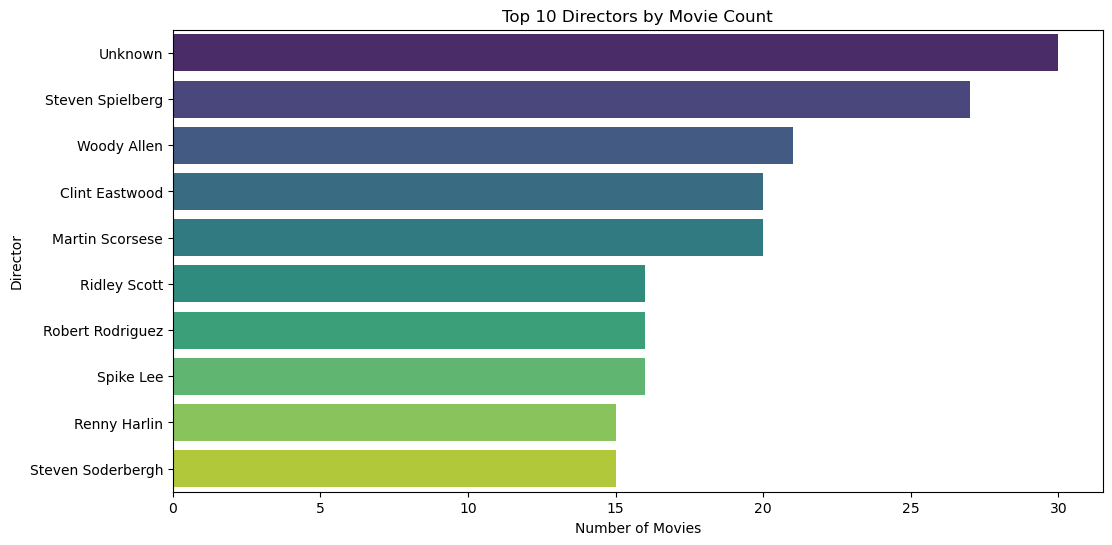

In [15]:
# Visualization 1: Bar Chart for Top 10 Directors by Movie Count
top_directors = credits['Director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

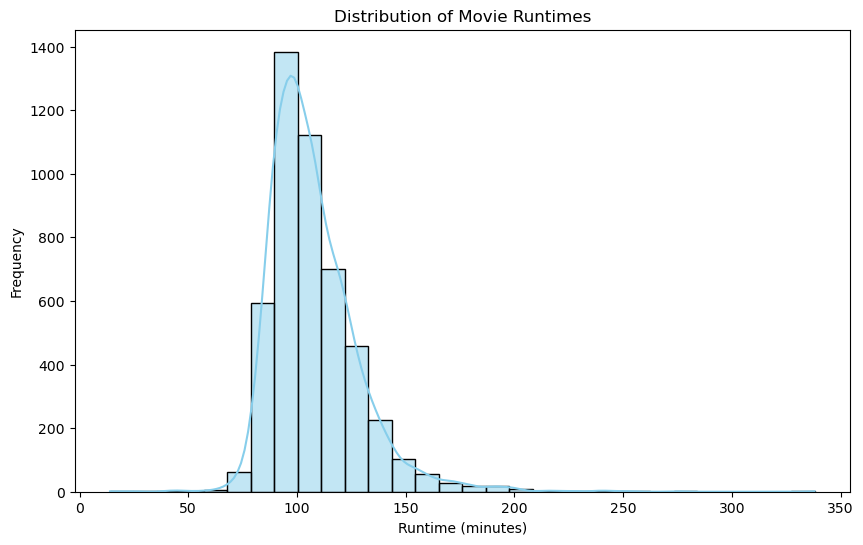

In [16]:
# Visualization 2: Histogram for Movie Runtimes
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


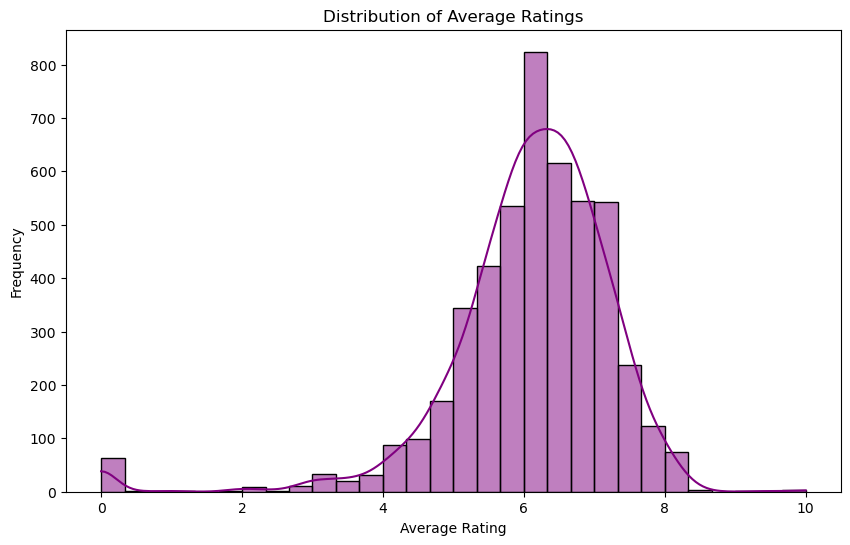

In [17]:
# Visualization 3: Distribution of Average Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=30, kde=True, color='purple')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

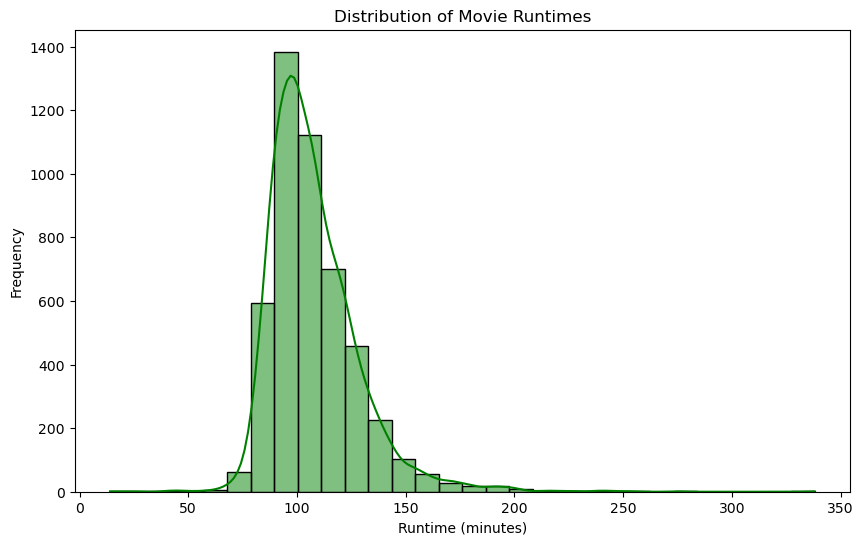

In [18]:
# Visualization 4: Distribution of Runtime
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=30, kde=True, color='green')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


In [19]:
# Check for duplicate movies
print(df['movie_id'].duplicated().sum())

# Display the first few rows of the merged dataframe
print(df.head())

0
   movie_id                                   title_x  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  245000000   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de.

In [20]:
import pandas as pd

# Read the CSV files
credits = pd.read_csv('credits.csv')
movies = pd.read_csv('movies.csv')

# Merge the datasets based on the movie ID column
merged_data = credits.merge(movies, left_on='movie_id', right_on='id', suffixes=('_credits', '_movies'))

# Save the merged dataset to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

In [21]:
print(df.columns)

Index(['movie_id', 'title_x', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'id', 'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title_y', 'vote_average', 'vote_count'],
      dtype='object')


In [22]:
print(df.head())

   movie_id                                   title_x  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  245000000   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...

In [23]:
def precision_at_k(actual, predicted, k):
    """
    Calculate precision at k.
    
    Parameters:
    - actual: List of actual items the user liked.
    - predicted: List of items recommended by the system.
    - k: Number of recommendations to consider.
    
    Returns:
    - Precision at k.
    """
    # Ensure that k is not greater than the number of items recommended
    k = min(k, len(predicted))
    
    # Consider only top-k recommendations
    predicted = predicted[:k]
    
    # Calculate the number of items relevant to the user
    relevant_items = set(actual)
    
    # Calculate the number of recommended items that are relevant
    num_relevant_at_k = len(set(predicted).intersection(relevant_items))
    
    # Calculate precision at k
    precision = num_relevant_at_k / k
    
    return precision

# Example usage:
actual_items = [1, 3, 5]  # Actual items the user liked
recommended_items = [1, 2, 3, 4, 5]  # Items recommended by the system

k = 10  # Consider top-3 recommendations

print(f"Precision at {k}: {precision_at_k(actual_items, recommended_items, k)}")

Precision at 10: 0.6
